In [1]:
## module and data imports
import pandas as pd, numpy as np

from sklearn.preprocessing import StandardScaler

from textblob import TextBlob

reviews = pd.read_csv('../data/all_reviews_without_unicode.csv')

product_data = pd.read_csv('../data/master_product_list.csv')

C:\Users\pconn\AppData\Local\Temp\ipykernel_6824\3355867318.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('../data/all_reviews_without_unicode.csv')


In [2]:
# two products from bestbuy were missing subjectivity
norton = TextBlob(
    """1-Year pre-paid subscription
A payment method must be stored in your Norton account to activate. You won't be charged again until the prepaid term ends. For new Norton subscriptions only at an introductory price.

Auto-Renewal
Never have a service disruption since this subscription auto-renews annually. If you do not wish to renew, you can cancel in your Norton account anytime.

Ongoing protection
Download instantly and install protection for up to 5 PCs, Macs, iOS or Android devices in minutes!

Real-time threat protection
Advanced security protects against existing and emerging malware threats, including ransomware and viruses, and it won't slow down your device performance.

50GB secure PC cloud backup
Store and help protect important files as a preventative measure to data loss due to hard drive failures, stolen devices and even ransomware.

Secure VPN
Browse anonymously and securely with a no-log VPN while using public Wi-Fi. Add bank-grade encryption to help keep your information like passwords and bank details secure and private.

Dark web monitoring
We monitor and notify you if we find your personal information on the Dark Web.

Password manager
Easily create, store, and manage your passwords, credit card information and other credentials online.

PC safe cam
Get notified if cybercriminals try to use your webcam on your PC, and we can help block them.

Smart firewall
Monitors all network activity to and from your computer, blocks cybercriminals and other unauthorized traffic.

Parental control
Manage your kids activities online. Help them explore, learn, and enjoy connected world safely on their Windows PCs or smartphones.

General disclaimers and disclosures
No one can prevent all cybercrime or identity theft.

Payment method required for pre-paid subscription. You are purchasing a recurring subscription which will automatically renew after the first year. To activate, you must enroll online and provide your billing information.

The price paid today is valid for the first year of subscription, and will automatically renew and charge your stored payment method. Applicable renewal price found at Norton.com/pricing.

The price is subject to change, but we will always send you a notification email in advance. You may cancel the automatic renewal by logging in to your account, or contacting Norton.

Coverage may include product, service and/or protection updates and features that may be added, modified or removed, subject to the applicable License and Services Agreement found on GenDigital.com/LSA.

Data collection, storage and use for subscription management and renewal purposes subject to the Global Privacy Statement at GenDigital.com/privacy.

Defaults to monitor your email address only. Log in to your Norton account to enter more info for monitoring. If you are a current LifeLock member, you must review and manage those settings in your LifeLock portal.

Norton Family Parental Control features are not supported on Mac

What's Included
Norton 360 Deluxe (5-Devices) (1-Year Subscription with Auto Renewal)

Manuals & Guides
Product Datasheet/Brochure (PDF)

English""" + """
Key Specs
Number of Devices
5
Number of Licenses
1
Operating System Compatibility
Android, Mac OS, Windows, Apple iOS
Software Format
Digital
Subscription Period
1 Year
General
Product Name
360 Deluxe (5 Device) Antivirus Internet Security Software + VPN + Dark Web Monitoring (1 Year Subscription)
Brand
Norton
Publisher
Norton
Model Number
SYT940800V011
Color Category
Multi
Features
Protection Type(s)
Malware, Password, Phishing, Privacy, Ransomware
Real-Time Protection
Yes
Parental Controls
Yes
Firewall Type
2-way
In-Software Purchases
Subscriptions
Cloud Based Software
Yes
Purchase rights
Number of Devices
5
Number of Licenses
1
Compatibility
Operating System Compatibility
Android, Mac OS, Windows, Apple iOS
Software Format
Digital
Requirements
Subscription
Yes
Subscription Period
1 Year
Download Requirements
Internet connection required, high speed recommended
Warranty
Manufacturer's Warranty - Parts
Not available
Manufacturer's Warranty - Labor
Not available
Other
UPC
037648687461
"""
)

norton.subjectivity

0.47821896779343576

In [3]:
mcafee = TextBlob(
    """Key Specs
Number of Devices
5
Operating System Compatibility
Android, Apple iOS, Chrome, Mac OS, Windows
Software Format
Digital
Subscription Period
1 Year
General
Product Name
Total Protection (5 Device) Antivirus & Internet Security Software (1-Year Subscription)
Brand
McAfee
Publisher
McAfee
Model Number
MCA950800V003
Features
Real-Time Protection
Yes
E-mail Security
Yes
Parental Controls
No
Firewall Type
Other
Purchase rights
Number of Devices
5
Compatibility
Operating System Compatibility
Android, Apple iOS, Chrome, Mac OS, Windows
Software Format
Digital
Requirements
Subscription
Yes
Subscription Period
1 Year
Digital Delivery Type
Download
Hard Drive Space Required
1.3 gigabytes
Warranty
Manufacturer's Warranty - Parts
Not available
Manufacturer's Warranty - Labor
Not available
OtherKey Specs
Number of Devices
5
Operating System Compatibility
Android, Apple iOS, Chrome, Mac OS, Windows
Software Format
Digital
Subscription Period
1 Year
General
Product Name
Total Protection (5 Device) Antivirus & Internet Security Software (1-Year Subscription)
Brand
McAfee
Publisher
McAfee
Model Number
MCA950800V003
Features
Real-Time Protection
Yes
E-mail Security
Yes
Parental Controls
No
Firewall Type
Other
Purchase rights
Number of Devices
5
Compatibility
Operating System Compatibility
Android, Apple iOS, Chrome, Mac OS, Windows
Software Format
Digital
Requirements
Subscription
Yes
Subscription Period
1 Year
Digital Delivery Type
Download
Hard Drive Space Required
1.3 gigabytes
Warranty
Manufacturer's Warranty - Parts
Not available
Manufacturer's Warranty - Labor
Not available
Other""" + """ Key Specs
Number of Devices
5
Operating System Compatibility
Android, Apple iOS, Chrome, Mac OS, Windows
Software Format
Digital
Subscription Period
1 Year
General
Product Name
Total Protection (5 Device) Antivirus & Internet Security Software (1-Year Subscription)
Brand
McAfee
Publisher
McAfee
Model Number
MCA950800V003
Features
Real-Time Protection
Yes
E-mail Security
Yes
Parental Controls
No
Firewall Type
Other
Purchase rights
Number of Devices
5
Compatibility
Operating System Compatibility
Android, Apple iOS, Chrome, Mac OS, Windows
Software Format
Digital
Requirements
Subscription
Yes
Subscription Period
1 Year
Digital Delivery Type
Download
Hard Drive Space Required
1.3 gigabytes
Warranty
Manufacturer's Warranty - Parts
Not available
Manufacturer's Warranty - Labor
Not available
Other"""
)
mcafee.subjectivity

0.3758064516129032

In [4]:
## Merge key product data into the review data frame

reviews['prodSiteID'] = reviews['prodSiteID'].str.upper()
product_data['prodSiteID'] = product_data['prodSiteID'].str.upper()

reviews = reviews.merge(
    right=pd.DataFrame(
      product_data[
        [
            'product_price','prodSiteID',
            'prod_subjectivity','total_star_rating','site'
        ]
      ]
    ),
    on='prodSiteID',
    how='left'
)


In [5]:
#get rid of unneeded columns
reviews = reviews.drop(['site_x','global_outlier_en','site_outlier','site_outlier_en','global_outlier'],axis=1)
#filter to english-only reviews
reviews = reviews[reviews['review_lang']=='en']
#rename a column for simplicity
reviews.rename({'site_y':'site'},axis=1,inplace=True)

In [6]:
reviews.head()
len(reviews)

47644

In [7]:
#identify the target columns for rounding to 2 or 3 standard deviations.
sites = reviews['site'].unique()
target_adj_cols = [
    'review_star_rating', 'review_helpful_votes',
    'review_subjectivity', 'review_polarity',
    'review_length','prod_subjectivity','total_star_rating'
]

In [8]:
#calculate the metrics (mean, std, max, min) on a per-website basis
mets = {}
for site in sites:
    mets[site] = {}
    if site:
        for t in target_adj_cols:
            mets[site][t] = {}
            mean = reviews[reviews['site']==site][t].mean()
            sd = reviews[reviews['site']==site][t].std()
            _min = reviews[reviews['site']==site][t].min()
            _max = reviews[reviews['site']==site][t].max()
            mets[site][t].update({'sd':sd,'mean':mean,'min':_min,'max':_max})
mets
# for t in target_adj_cols:
#     mets[t] = {'mean':0,'sd':0}
#del mets[np.nan]


{'amazon': {'review_star_rating': {'sd': 1.5781157515745403,
   'mean': 3.31094919259551,
   'min': 1,
   'max': 5},
  'review_helpful_votes': {'sd': 17.13913558726027,
   'mean': 3.1242615202835764,
   'min': 0,
   'max': 637},
  'review_subjectivity': {'sd': 0.1897094111939892,
   'mean': 0.5329629161108703,
   'min': 0.0,
   'max': 1.0},
  'review_polarity': {'sd': 0.27780993992039776,
   'mean': 0.17296789330779835,
   'min': -1.0,
   'max': 1.0},
  'review_length': {'sd': 79.25230040500267,
   'mean': 65.95135880267821,
   'min': 1.0,
   'max': 1164.0},
  'prod_subjectivity': {'sd': 0.10116554912538159,
   'mean': 0.517342248820061,
   'min': 0.3628571428571429,
   'max': 0.7742424242424243},
  'total_star_rating': {'sd': 0.385574338131994,
   'mean': 4.328672705789681,
   'min': 3.4,
   'max': 4.9}},
 'Target': {'review_star_rating': {'sd': 1.012400860056403,
   'mean': 4.474771115853239,
   'min': 1,
   'max': 5},
  'review_helpful_votes': {'sd': 1.7735292924666806,
   'mean': 0

In [9]:
mets

{'amazon': {'review_star_rating': {'sd': 1.5781157515745403,
   'mean': 3.31094919259551,
   'min': 1,
   'max': 5},
  'review_helpful_votes': {'sd': 17.13913558726027,
   'mean': 3.1242615202835764,
   'min': 0,
   'max': 637},
  'review_subjectivity': {'sd': 0.1897094111939892,
   'mean': 0.5329629161108703,
   'min': 0.0,
   'max': 1.0},
  'review_polarity': {'sd': 0.27780993992039776,
   'mean': 0.17296789330779835,
   'min': -1.0,
   'max': 1.0},
  'review_length': {'sd': 79.25230040500267,
   'mean': 65.95135880267821,
   'min': 1.0,
   'max': 1164.0},
  'prod_subjectivity': {'sd': 0.10116554912538159,
   'mean': 0.517342248820061,
   'min': 0.3628571428571429,
   'max': 0.7742424242424243},
  'total_star_rating': {'sd': 0.385574338131994,
   'mean': 4.328672705789681,
   'min': 3.4,
   'max': 4.9}},
 'Target': {'review_star_rating': {'sd': 1.012400860056403,
   'mean': 4.474771115853239,
   'min': 1,
   'max': 5},
  'review_helpful_votes': {'sd': 1.7735292924666806,
   'mean': 0

In [10]:
#reviews.to_csv('../data/unadjusted_final_reviews.csv')

In [11]:
mets_fr = pd.DataFrame(mets)

In [12]:
#initialize columns to bring in metrics to the dataframe on a per-site, per adjustment column basis
for t in target_adj_cols:
    reviews[t+'_mu'] = 0
    reviews[t+'_sd'] = 0
    reviews[t+'_min'] = 0
    reviews[t+'_max'] = 0 
reviews


,productID,prodSiteID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,review_subjectivity,review_polarity,...,review_length_min,review_length_max,prod_subjectivity_mu,prod_subjectivity_sd,prod_subjectivity_min,prod_subjectivity_max,total_star_rating_mu,total_star_rating_sd,total_star_rating_min,total_star_rating_max
0,1,AMAZON1,It is renewed but looked like new,Andre,"It was packaged very well, Amazon packaging, n...",5,1,True,0.588232,0.258266,...,0,0,0,0,0,0,0,0,0,0
1,1,AMAZON1,Worth it,Alice,"The phone came in perfect conditions, without ...",5,2,True,0.430909,0.447273,...,0,0,0,0,0,0,0,0,0,0
2,1,AMAZON1,Amazon Warehouse for the Win!,Mrs. K,I got a great deal on this at Amazon Warehouse...,5,2,True,0.554959,0.394215,...,0,0,0,0,0,0,0,0,0,0
3,1,AMAZON1,Awesome,David Chaves Rojas,"Got my phone, 10/10. No scratches, still have ...",5,0,True,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
4,1,AMAZON1,Like new iPhone 14,Rick,The iPhone 14 came with a battery that had 100...,5,0,True,0.636364,0.424242,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48076,41,BB41,Returned this product,TraceyPortchester,did not have the capacity to safeguard all of ...,1,0,True,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
48077,41,BB41,forget BB,Deede,Received in email but not downloadable. Geek ...,1,0,True,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
48078,41,BB41,Decent product,RamonI,Its a good antivirus program it does keep my c...,4,0,True,0.608333,0.088333,...,0,0,0,0,0,0,0,0,0,0
48079,41,BB41,Works great,GracieW,"Works great, never had a problem with it, will...",5,0,True,0.750000,0.800000,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#return from the metrics dictionary the per-site, per-column metrics needed for rounding
def get_mets(row,col):
    return (
        mets[row['site']][col]['mean'],
        mets[row['site']][col]['sd'],
        mets[row['site']][col]['min'],
        mets[row['site']][col]['max']
    )


#insert the appropriate metric for the appropriate column into the dataframe.
for i,row in reviews.iterrows():
    for t in target_adj_cols:
        mu,sd,_min,_max = get_mets(row,t)
        reviews.loc[i,t+'_mu'] = mu
        reviews.loc[i,t+'_sd'] = sd
        reviews.loc[i,t+'_min'] = _max
        reviews.loc[i,t+'_max'] = _min

# for t in target_adj_cols:
#     dat = get_mu_sd
#     reviews[[t+'_mu',t+'_sd']] = reviews.apply(lambda row: get_mu_sd(row,t),axis=1)
    # reviews[t+'_adj2']
    # reviews[t+]

reviews

KeyboardInterrupt: 

In [ ]:
#add blank columns for 2 and 3 standard deviation adjustments
for t in target_adj_cols:
    reviews[t+'_adj2sd'] = 0
    reviews[t+'_adj3sd'] = 0


#apply the adjustments to every row in the dataframe using existing values.
for i,row in reviews.iterrows():
    for t in target_adj_cols:
        reviews.loc[i,t+'_adj2sd'] = np.select(
            [
                row[t] > row[t+'_mu'] + 2*row[t+'_sd'],
                row[t] < row[t+'_mu'] - 2*row[t+'_sd']
            ],
            [
                min(row[t+'_max'], row[t+'_mu']+row[t+'_sd']*2),
                max(row[t+'_min'], row[t+'_mu']-row[t+'_sd']*2)
            ],
            default=row[t]
        )
        reviews.loc[i,t+'_adj3sd'] = np.select(
            [
                row[t] > row[t+'_mu'] + 3*row[t+'_sd'],
                row[t] < row[t+'_mu'] - 3*row[t+'_sd']
            ],
            [
                min(row[t+'_max'], row[t+'_mu']+row[t+'_sd']*3),
                max(row[t+'_min'], row[t+'_mu']-row[t+'_sd']*3)
            ],
            default=row[t]
        )



# for t in target_adj_cols:
#     reviews[t+'_adj2sd'] = reviews.apply(
#         lambda row: np.select(
#             [
#                 row[t] > row[t+'_mu'] + 2*row[t+'_sd'],
#                 row[t] < row[t+'_mu'] - 2*row[t+'_sd']
#             ],
#             [
#             min(row[t+'_max'], row[t+'_mu']+row[t+'_sd']*2),
#             max(row[t+'_min'], row[t+'_mu']-row[t+'_sd']*2)
#             ],
#             default=row[t]
#         )
#     )



#     reviews[t+'_adj2sd'] = np.select(
#         [
#             reviews[t] > reviews[t+'_mu'] + 2*reviews[t+'_sd'],
#             reviews[t] < reviews[t+'_mu'] - 2*reviews[t+'_sd']
#         ],
#         [
#             min(reviews[t+'_max'], reviews[t+'_mu']+reviews[t+'_sd']*2),
#             max(reviews[t+'_min'], reviews[t+'_mu']-reviews[t+'_sd']*2)
#         ]
#     )

#     reviews[t+'_adj3sd'] = np.select(
#         [
#             reviews[t] > reviews[t+'_mu'] + 3*reviews[t+'_sd'],
#             reviews[t] < reviews[t+'_mu'] - 3*reviews[t+'_sd']
#         ],
#         [
#             min(reviews[t+'_max'], reviews[t+'_mu']+reviews[t+'_sd']*3),
#             max(reviews[t+'_min'], reviews[t+'_mu']-reviews[t+'_sd']*3)
#         ]
#     )


In [ ]:
len(reviews)

47644

In [ ]:
reviews

,productID,prodSiteID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,review_subjectivity,review_polarity,...,review_subjectivity_adj2sd,review_subjectivity_adj3sd,review_polarity_adj2sd,review_polarity_adj3sd,review_length_adj2sd,review_length_adj3sd,prod_subjectivity_adj2sd,prod_subjectivity_adj3sd,total_star_rating_adj2sd,total_star_rating_adj3sd
0,1,AMAZON1,It is renewed but looked like new,Andre,"It was packaged very well, Amazon packaging, n...",5,1,True,0.588232,0.258266,...,0.588232,0.588232,0.258266,0.258266,49,49,0.497845,0.497845,4.2,4.2
1,1,AMAZON1,Worth it,Alice,"The phone came in perfect conditions, without ...",5,2,True,0.430909,0.447273,...,0.430909,0.430909,0.447273,0.447273,24,24,0.497845,0.497845,4.2,4.2
2,1,AMAZON1,Amazon Warehouse for the Win!,Mrs. K,I got a great deal on this at Amazon Warehouse...,5,2,True,0.554959,0.394215,...,0.554959,0.554959,0.394215,0.394215,66,66,0.497845,0.497845,4.2,4.2
3,1,AMAZON1,Awesome,David Chaves Rojas,"Got my phone, 10/10. No scratches, still have ...",5,0,True,1.000000,1.000000,...,0.000000,1.000000,-1.000000,1.000000,14,14,0.497845,0.497845,4.2,4.2
4,1,AMAZON1,Like new iPhone 14,Rick,The iPhone 14 came with a battery that had 100...,5,0,True,0.636364,0.424242,...,0.636364,0.636364,0.424242,0.424242,31,31,0.497845,0.497845,4.2,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48076,41,BB41,Returned this product,TraceyPortchester,did not have the capacity to safeguard all of ...,1,0,True,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,11,11,0.478219,0.478219,4.4,4.4
48077,41,BB41,forget BB,Deede,Received in email but not downloadable. Geek ...,1,0,True,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,15,15,0.478219,0.478219,4.4,4.4
48078,41,BB41,Decent product,RamonI,Its a good antivirus program it does keep my c...,4,0,True,0.608333,0.088333,...,0.608333,0.608333,0.088333,0.088333,35,35,0.478219,0.478219,4.4,4.4
48079,41,BB41,Works great,GracieW,"Works great, never had a problem with it, will...",5,0,True,0.750000,0.800000,...,0.750000,0.750000,0.800000,0.800000,11,11,0.478219,0.478219,4.4,4.4


In [ ]:
#write the data out so that we have an adjusted dataframe.
reviews.to_csv('../data/adjusted_final_reviews.csv')

In [ ]:
#define new dfs for merger and training and testing
adj = pd.read_csv('../data/adjusted_final_reviews.csv')
unadj = pd.read_csv('../data/unadjusted_final_reviews.csv')

C:\Users\pconn\AppData\Local\Temp\ipykernel_18828\1188396240.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  adj = pd.read_csv('../data/adjusted_final_reviews.csv')
C:\Users\pconn\AppData\Local\Temp\ipykernel_18828\1188396240.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  unadj = pd.read_csv('../data/unadjusted_final_reviews.csv')


In [ ]:
adj

,Unnamed: 0,productID,prodSiteID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,review_subjectivity,...,review_subjectivity_adj2sd,review_subjectivity_adj3sd,review_polarity_adj2sd,review_polarity_adj3sd,review_length_adj2sd,review_length_adj3sd,prod_subjectivity_adj2sd,prod_subjectivity_adj3sd,total_star_rating_adj2sd,total_star_rating_adj3sd
0,0,1,AMAZON1,It is renewed but looked like new,Andre,"It was packaged very well, Amazon packaging, n...",5,1,True,0.588232,...,0.588232,0.588232,0.258266,0.258266,49,49,0.497845,0.497845,4.2,4.2
1,1,1,AMAZON1,Worth it,Alice,"The phone came in perfect conditions, without ...",5,2,True,0.430909,...,0.430909,0.430909,0.447273,0.447273,24,24,0.497845,0.497845,4.2,4.2
2,2,1,AMAZON1,Amazon Warehouse for the Win!,Mrs. K,I got a great deal on this at Amazon Warehouse...,5,2,True,0.554959,...,0.554959,0.554959,0.394215,0.394215,66,66,0.497845,0.497845,4.2,4.2
3,3,1,AMAZON1,Awesome,David Chaves Rojas,"Got my phone, 10/10. No scratches, still have ...",5,0,True,1.000000,...,0.000000,1.000000,-1.000000,1.000000,14,14,0.497845,0.497845,4.2,4.2
4,4,1,AMAZON1,Like new iPhone 14,Rick,The iPhone 14 came with a battery that had 100...,5,0,True,0.636364,...,0.636364,0.636364,0.424242,0.424242,31,31,0.497845,0.497845,4.2,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47639,48076,41,BB41,Returned this product,TraceyPortchester,did not have the capacity to safeguard all of ...,1,0,True,0.000000,...,1.000000,1.000000,0.000000,0.000000,11,11,0.478219,0.478219,4.4,4.4
47640,48077,41,BB41,forget BB,Deede,Received in email but not downloadable. Geek ...,1,0,True,0.000000,...,1.000000,1.000000,0.000000,0.000000,15,15,0.478219,0.478219,4.4,4.4
47641,48078,41,BB41,Decent product,RamonI,Its a good antivirus program it does keep my c...,4,0,True,0.608333,...,0.608333,0.608333,0.088333,0.088333,35,35,0.478219,0.478219,4.4,4.4
47642,48079,41,BB41,Works great,GracieW,"Works great, never had a problem with it, will...",5,0,True,0.750000,...,0.750000,0.750000,0.800000,0.800000,11,11,0.478219,0.478219,4.4,4.4


In [ ]:
adj.columns

Index(['Unnamed: 0', 'productID', 'prodSiteID', 'review_header',
       'reviewer_name', 'review_content', 'review_star_rating',
       'review_helpful_votes', 'verified_purchase', 'review_subjectivity',
       'review_polarity', 'review_length', 'url', 'review_lang',
       'product_price', 'prod_subjectivity', 'total_star_rating', 'site',
       'review_star_rating_mu', 'review_star_rating_sd',
       'review_star_rating_min', 'review_star_rating_max',
       'review_helpful_votes_mu', 'review_helpful_votes_sd',
       'review_helpful_votes_min', 'review_helpful_votes_max',
       'review_subjectivity_mu', 'review_subjectivity_sd',
       'review_subjectivity_min', 'review_subjectivity_max',
       'review_polarity_mu', 'review_polarity_sd', 'review_polarity_min',
       'review_polarity_max', 'review_length_mu', 'review_length_sd',
       'review_length_min', 'review_length_max', 'prod_subjectivity_mu',
       'prod_subjectivity_sd', 'prod_subjectivity_min',
       'prod_subjectivit

In [ ]:
unadj.columns

    # 'review_star_rating_adjusted', 'review_helpful_votes_adjusted',
    # 'review_subjectivity_adjusted', 'review_polarity_adjusted',
    # 'review_length_adjusted','prod_subjectivity','total_star_rating'

Index(['Unnamed: 0', 'productID', 'prodSiteID', 'review_header',
       'reviewer_name', 'review_content', 'review_star_rating',
       'review_helpful_votes', 'verified_purchase', 'review_subjectivity',
       'review_polarity', 'review_length', 'url', 'review_lang',
       'product_price', 'prod_subjectivity', 'total_star_rating', 'site'],
      dtype='object')

In [ ]:
adj = adj[[
    'productID', 
    'prodSiteID', 
    'site',
    'reviewer_name',
    'review_header',
    'review_content','verified_purchase',
    'review_star_rating_adj2sd',
    'review_star_rating_adj3sd',
    'review_helpful_votes_adj2sd',
    'review_helpful_votes_adj3sd',
    'review_subjectivity_adj2sd',
    'review_subjectivity_adj3sd',
    'review_polarity_adj2sd',
    'review_polarity_adj3sd',
    'prod_subjectivity_adj2sd',
    'prod_subjectivity_adj3sd',
    'review_length_adj2sd',
    'review_length_adj3sd',    
    'total_star_rating_adj2sd',
    'total_star_rating_adj3sd'
]].copy()

In [ ]:
unadj = unadj[[
    'productID', 
    'prodSiteID', 
    'site',
    'reviewer_name',
    'review_header',
    'review_content',
    'verified_purchase',
    'review_star_rating',
    'review_helpful_votes',
    'review_subjectivity',
    'review_polarity',
    'prod_subjectivity',
    'review_length', 
    'total_star_rating',
]].copy()

In [ ]:
unadj

,productID,prodSiteID,site,reviewer_name,review_header,review_content,verified_purchase,review_star_rating,review_helpful_votes,review_subjectivity,review_polarity,prod_subjectivity,review_length,total_star_rating
0,1,AMAZON1,amazon,Andre,It is renewed but looked like new,"It was packaged very well, Amazon packaging, n...",True,5,1,0.588232,0.258266,0.497845,49.0,4.2
1,1,AMAZON1,amazon,Alice,Worth it,"The phone came in perfect conditions, without ...",True,5,2,0.430909,0.447273,0.497845,24.0,4.2
2,1,AMAZON1,amazon,Mrs. K,Amazon Warehouse for the Win!,I got a great deal on this at Amazon Warehouse...,True,5,2,0.554959,0.394215,0.497845,66.0,4.2
3,1,AMAZON1,amazon,David Chaves Rojas,Awesome,"Got my phone, 10/10. No scratches, still have ...",True,5,0,1.000000,1.000000,0.497845,14.0,4.2
4,1,AMAZON1,amazon,Rick,Like new iPhone 14,The iPhone 14 came with a battery that had 100...,True,5,0,0.636364,0.424242,0.497845,31.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47639,41,BB41,bestbuy,TraceyPortchester,Returned this product,did not have the capacity to safeguard all of ...,True,1,0,0.000000,0.000000,0.478219,11.0,4.4
47640,41,BB41,bestbuy,Deede,forget BB,Received in email but not downloadable. Geek ...,True,1,0,0.000000,0.000000,0.478219,15.0,4.4
47641,41,BB41,bestbuy,RamonI,Decent product,Its a good antivirus program it does keep my c...,True,4,0,0.608333,0.088333,0.478219,35.0,4.4
47642,41,BB41,bestbuy,GracieW,Works great,"Works great, never had a problem with it, will...",True,5,0,0.750000,0.800000,0.478219,11.0,4.4


In [ ]:
adj

,productID,prodSiteID,site,reviewer_name,review_header,review_content,verified_purchase,review_star_rating_adj2sd,review_star_rating_adj3sd,review_helpful_votes_adj2sd,...,review_subjectivity_adj2sd,review_subjectivity_adj3sd,review_polarity_adj2sd,review_polarity_adj3sd,prod_subjectivity_adj2sd,prod_subjectivity_adj3sd,review_length_adj2sd,review_length_adj3sd,total_star_rating_adj2sd,total_star_rating_adj3sd
0,1,AMAZON1,amazon,Andre,It is renewed but looked like new,"It was packaged very well, Amazon packaging, n...",True,5,5,1,...,0.588232,0.588232,0.258266,0.258266,0.497845,0.497845,49,49,4.2,4.2
1,1,AMAZON1,amazon,Alice,Worth it,"The phone came in perfect conditions, without ...",True,5,5,2,...,0.430909,0.430909,0.447273,0.447273,0.497845,0.497845,24,24,4.2,4.2
2,1,AMAZON1,amazon,Mrs. K,Amazon Warehouse for the Win!,I got a great deal on this at Amazon Warehouse...,True,5,5,2,...,0.554959,0.554959,0.394215,0.394215,0.497845,0.497845,66,66,4.2,4.2
3,1,AMAZON1,amazon,David Chaves Rojas,Awesome,"Got my phone, 10/10. No scratches, still have ...",True,5,5,0,...,0.000000,1.000000,-1.000000,1.000000,0.497845,0.497845,14,14,4.2,4.2
4,1,AMAZON1,amazon,Rick,Like new iPhone 14,The iPhone 14 came with a battery that had 100...,True,5,5,0,...,0.636364,0.636364,0.424242,0.424242,0.497845,0.497845,31,31,4.2,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47639,41,BB41,bestbuy,TraceyPortchester,Returned this product,did not have the capacity to safeguard all of ...,True,5,5,0,...,1.000000,1.000000,0.000000,0.000000,0.478219,0.478219,11,11,4.4,4.4
47640,41,BB41,bestbuy,Deede,forget BB,Received in email but not downloadable. Geek ...,True,5,5,0,...,1.000000,1.000000,0.000000,0.000000,0.478219,0.478219,15,15,4.4,4.4
47641,41,BB41,bestbuy,RamonI,Decent product,Its a good antivirus program it does keep my c...,True,4,4,0,...,0.608333,0.608333,0.088333,0.088333,0.478219,0.478219,35,35,4.4,4.4
47642,41,BB41,bestbuy,GracieW,Works great,"Works great, never had a problem with it, will...",True,5,5,0,...,0.750000,0.750000,0.800000,0.800000,0.478219,0.478219,11,11,4.4,4.4


In [ ]:
x = product_data['prodSiteID'].unique()
x.sort()
x

array(['AMAZON1', 'AMAZON10', 'AMAZON11', 'AMAZON12', 'AMAZON13',
       'AMAZON14', 'AMAZON15', 'AMAZON16', 'AMAZON17', 'AMAZON18',
       'AMAZON19', 'AMAZON2', 'AMAZON20', 'AMAZON21', 'AMAZON22',
       'AMAZON23', 'AMAZON24', 'AMAZON3', 'AMAZON4', 'AMAZON5', 'AMAZON6',
       'AMAZON7', 'AMAZON8', 'AMAZON9', 'BB1', 'BB10', 'BB11', 'BB12',
       'BB13', 'BB14', 'BB15', 'BB2', 'BB3', 'BB4', 'BB40', 'BB41', 'BB5',
       'BB6', 'BB7', 'BB8', 'BB9', 'TARGET1', 'TARGET10', 'TARGET11',
       'TARGET12', 'TARGET13', 'TARGET14', 'TARGET15', 'TARGET16',
       'TARGET17', 'TARGET18', 'TARGET19', 'TARGET2', 'TARGET20',
       'TARGET3', 'TARGET4', 'TARGET5', 'TARGET6', 'TARGET7', 'TARGET8',
       'TARGET9'], dtype=object)

In [ ]:
x = adj['prodSiteID'].unique()
x.sort()
x

array(['AMAZON1', 'AMAZON10', 'AMAZON11', 'AMAZON12', 'AMAZON13',
       'AMAZON14', 'AMAZON15', 'AMAZON16', 'AMAZON17', 'AMAZON18',
       'AMAZON19', 'AMAZON2', 'AMAZON20', 'AMAZON21', 'AMAZON22',
       'AMAZON23', 'AMAZON24', 'AMAZON3', 'AMAZON4', 'AMAZON5', 'AMAZON6',
       'AMAZON7', 'AMAZON8', 'AMAZON9', 'BB1', 'BB11', 'BB12', 'BB13',
       'BB14', 'BB15', 'BB2', 'BB3', 'BB4', 'BB40', 'BB41', 'BB5', 'BB6',
       'BB7', 'BB8', 'BB9', 'TARGET1', 'TARGET10', 'TARGET11', 'TARGET12',
       'TARGET13', 'TARGET14', 'TARGET15', 'TARGET16', 'TARGET17',
       'TARGET18', 'TARGET19', 'TARGET2', 'TARGET20', 'TARGET3',
       'TARGET5', 'TARGET6', 'TARGET8', 'TARGET9'], dtype=object)

In [ ]:
#define the list of common items for use within our training
common = adj[adj['productID'].isin([1,2,3,5,6,8,9,11,12,13,14,15])].copy()

#get 80% of the data for training purposes
final_train = common.sample(n=int(0.8*len(common)))

#include everything else in the final testing dataframe
final_test = unadj[~unadj.index.isin(final_train.index)].copy()

#verify we have everything between all dataframes
display(len(final_train),len(final_test),len(final_train)+len(final_test),len(unadj))

27931

19713

47644

47644

In [ ]:
#output the final training and test datasets to CSV
final_train.to_csv('../../final_train.csv')
final_test.to_csv('../../final_test.csv')

In [14]:
#final_train.columns
final_train = pd.read_csv('../../final_train.csv')
final_test = pd.read_csv('../../final_test.csv')

## FROM HERE DOWN SHOULD GO IN THE MODELS IMPLEMENTED PAGE

In [35]:
#add columns based upon 2sd and 3sd rounding
final_train['is_helpful2'] = np.select(
    [
        final_train['review_helpful_votes_adj2sd'] > 0,
        final_train['review_helpful_votes_adj2sd'] == 0
    ],
    [1,0],
    default=0
)

final_train['is_helpful3'] = np.select(
    [
        final_train['review_helpful_votes_adj3sd'] > 0,
        final_train['review_helpful_votes_adj3sd'] == 0
    ],
    [1,0]
)

final_test['is_helpful'] = np.select(
    [
        final_test['review_helpful_votes'] > 0,
        final_test['review_helpful_votes'] == 0
    ],
    [1,0]
)

X_train2,X_train3,X_test,y_train2,y_train3,y_test = [
    StandardScaler().fit_transform(
        np.array(
            final_train[[
                'review_star_rating_adj2sd', 
                #'review_helpful_votes_adj2sd',
                'review_subjectivity_adj2sd', 
                'review_polarity_adj2sd',
                'review_length_adj2sd',
                'prod_subjectivity_adj2sd',
                'verified_purchase',
                #,'total_star_rating_adj2sd'
            ]]
        )
    ),
    StandardScaler().fit_transform(
        np.array(
            final_train[[
                'review_star_rating_adj3sd', 
                #'review_helpful_votes_adj3sd',
                'review_subjectivity_adj3sd', 
                'review_polarity_adj3sd',
                'review_length_adj3sd',
                'prod_subjectivity_adj3sd',
                'verified_purchase',
                #'total_star_rating_adj3sd',
            ]]
        )
    ),
    StandardScaler().fit_transform(
        np.array(
            final_test[[
                'review_star_rating',
                 #'review_helpful_votes',
                'review_subjectivity', 
                'review_polarity',
                'review_length',
                'prod_subjectivity',
                'verified_purchase'
                #,'total_star_rating',
            ]]
        )
    ),
    np.array(final_train['is_helpful2']),
    np.array(final_train['is_helpful3']),
    np.array(final_test['is_helpful'])
]



In [36]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=3997,sampling_strategy='minority')


X_ROS2sig,y_ROS2sig = ros.fit_resample(X_train2,y_train2)
X_ROS3sig,y_ROS3sig = ros.fit_resample(X_train3,y_train3)
y_trn3 = y_train3.copy()
y_train2,y_train3 = y_ROS2sig,y_ROS3sig

In [17]:
#check and verify that the columns were written in correctly
all(final_train['review_helpful_votes_adj3sd']>= final_train['is_helpful3'])
X_ROS3sig.shape

(51692, 6)

In [18]:
#proceed to model building and analysis

from sklearn.decomposition import PCA

pca = PCA()
# pcs2 = pca.fit_transform(X_train2)
pcs2 = pca.fit_transform(X_ROS3sig)
pr_df = pd.DataFrame(data=pcs2)
pr_df.columns = ["PC{}".format(i) for i in range(1,len(pca.components_)+1)]
exp_var = pca.explained_variance_ratio_
cum_var = np.cumsum(exp_var)
cum_var_df = pd.DataFrame({
    'Principal Component':[f'PC{i+1}' for i in range(len(cum_var))],
    'Cumulative Variance':cum_var,
    'Explained Variance':exp_var
})
cum_var_df
pca = PCA(n_components=5)
w=pca.fit(X_train2)
# X_train2_pca=pca.transform(X_train2)
# X_train3_pca=pca.transform(X_train3)
X_train2_pca=pca.transform(X_ROS2sig)
X_train3_pca=pca.transform(X_ROS3sig)
X_test_pca=pca.transform(X_test)

In [19]:
cum_var_df

,Principal Component,Cumulative Variance,Explained Variance
0,PC1,0.421271,0.421271
1,PC2,0.594196,0.172925
2,PC3,0.747300,0.153104
3,PC4,0.860622,0.113322
4,PC5,0.933462,0.072840
5,PC6,1.000000,0.066538


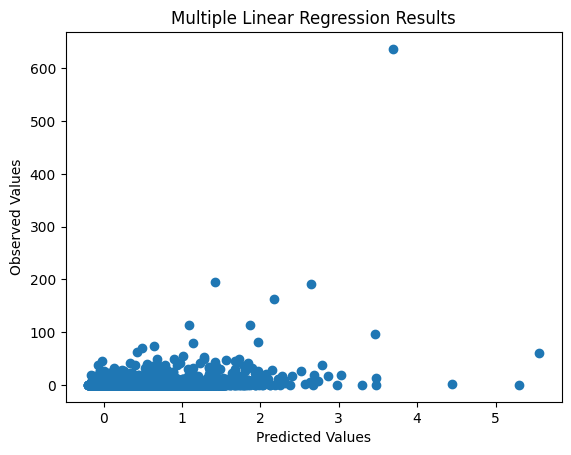

-241.67690242970033

34.5054184784722

In [20]:
y_train2_mlr,y_train3_mlr, y_test_mlr = [
    np.array(final_train['review_helpful_votes_adj2sd']),
    np.array(final_train['review_helpful_votes_adj3sd']),
    np.array(final_test['review_helpful_votes'])
]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

mlr = LinearRegression()

mlr.fit(X_train2,y_train2_mlr)

y_hat_base = mlr.predict(X_test)
import matplotlib.pyplot as plt
plt.title('Multiple Linear Regression Results')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.scatter(
    y_hat_base,y_test_mlr    
)
plt.show()

display(
    r2_score(y_hat_base,y_test_mlr),
    np.mean((y_hat_base - y_test_mlr)**2)
)

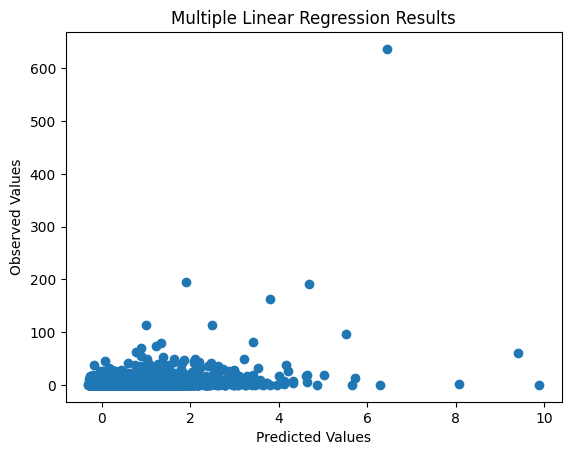

-151.5921269372636

34.010217394815655

In [21]:
y_train2_mlr,y_train3_mlr, y_test_mlr = [
    np.array(final_train['review_helpful_votes_adj2sd']),
    np.array(final_train['review_helpful_votes_adj3sd']),
    np.array(final_test['review_helpful_votes'])
]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

mlr = LinearRegression()

mlr.fit(X_train3,y_train3_mlr)

y_hat_base = mlr.predict(X_test)
import matplotlib.pyplot as plt
plt.title('Multiple Linear Regression Results')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.scatter(
    y_hat_base,y_test_mlr    
)
plt.show()

display(
    r2_score(y_hat_base,y_test_mlr),
    np.mean((y_hat_base - y_test_mlr)**2)
)

In [ ]:
mlr.coef_
#what each coef means in sequence
                # 'review_star_rating', 'review_helpful_votes',
                # 'review_subjectivity', 'review_polarity',
                # 'review_length','prod_subjectivity','total_star_rating','verified_purchase'

array([-0.24821237,  0.01493221, -0.00213131,  0.34423408,  0.03469942,
        0.09000918])

In [22]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
# from sklearn import tree
from sklearn.metrics import (
    accuracy_score,f1_score,
    precision_score,recall_score, 
    confusion_matrix, ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from imblearn.over_sampling import ADASYN, SMOTE
import random

import statsmodels.api as sm

test_metrics = pd.DataFrame(
    {
        'Model':[],
        'Outlier Rounding':[],
        'Accuracy':[],
        'F1':[],
        'Precision':[],
        'Recall':[]
    }
)

,Model,Outlier Rounding,Accuracy,F1,Precision,Recall
0,Logistic Regression (TUNED),2sd,0.787653,0.355405,0.257417,0.573844
1,Logistic Regression (ADASYN),2sd,0.787653,0.355405,0.257417,0.573844
2,Logistic Regression (SMOTE),2sd,0.787653,0.355405,0.257417,0.573844


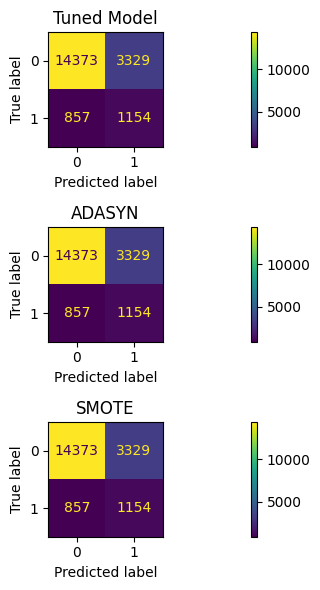

In [23]:
# need to divide into pieces to add figures / labels for each.
#Logmod hyperparameter
random.seed(123)

LogMod = LogisticRegression(class_weight={0:.5,1:.5})
LogMod.fit(X_train2_pca,y_train2)
y_pred = (LogMod.predict_proba(X_test_pca)[:,1]>0.5)

test_metrics.loc[len(test_metrics)] = {
    'Model':'Logistic Regression (TUNED)',
    'Outlier Rounding': "2sd",
    'Accuracy':accuracy_score(y_test,y_pred),
    'F1':f1_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred)
}
# ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
# display(test_metrics)

#### Logmod ADASYN

adasyn = ADASYN()
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train2_pca, y_train2)
logmod_adasyn = LogisticRegression()
logmod_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = logmod_adasyn.predict(X_test_pca)


test_metrics.loc[len(test_metrics)] = {
    'Model': 'Logistic Regression (ADASYN)',
    'Outlier Rounding': "2sd",
    'Accuracy': accuracy_score(y_test, y_pred_adasyn),
    'F1': f1_score(y_test, y_pred_adasyn),
    'Precision': precision_score(y_test, y_pred_adasyn),
    'Recall': recall_score(y_test, y_pred_adasyn)
}

# ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_adasyn)).plot()
# display(test_metrics)

X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

#### Logmod SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train2_pca, y_train2)
logmod_smote = LogisticRegression()
logmod_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = logmod_smote.predict(X_test_pca)

test_metrics.loc[len(test_metrics)] = {
    'Model': 'Logistic Regression (SMOTE)',
    'Outlier Rounding': "2sd",
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'F1': f1_score(y_test, y_pred_smote),
    'Precision': precision_score(y_test, y_pred_smote),
    'Recall': recall_score(y_test, y_pred_smote)
}


# ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_smote)).plot()
# display(test_metrics)

# test_metrics_df = pd.DataFrame(test_metrics)
# #display(test_metrics_df[:3].style.hide(axis='index'))
# display(test_metrics[test_metrics['Model'].str.contains('Logistic')])

display(
    test_metrics[
        (test_metrics['Model'].str.contains('Logistic')) & 
        (test_metrics['Outlier Rounding']=='2sd')    
    ]
)

fig, axes = plt.subplots(3, 1, figsize=(18, 6))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(ax=axes[0])
axes[0].set_title('Tuned Model')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_adasyn)).plot(ax=axes[1])
axes[1].set_title('ADASYN')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_smote)).plot(ax=axes[2])
axes[2].set_title('SMOTE')

plt.tight_layout()
plt.show()
 

,Model,Outlier Rounding,Accuracy,F1,Precision,Recall
3,Logistic Regression (TUNED),3sd,0.790494,0.372340,0.268111,0.60915
4,Logistic Regression (ADASYN),3sd,0.790494,0.368115,0.265856,0.59821
5,Logistic Regression (SMOTE),3sd,0.790494,0.368115,0.265856,0.59821


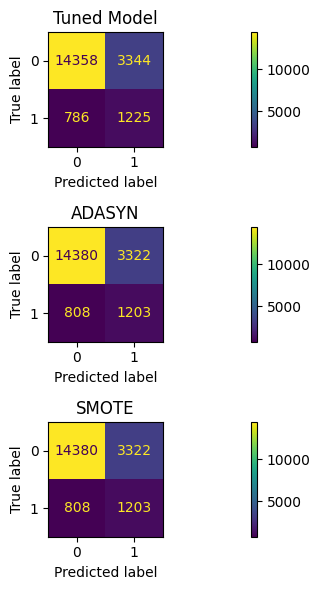

In [24]:
# need to divide into pieces to add figures / labels for each.
#Logmod hyperparameter
random.seed(123)

#LogMod = LogisticRegression(class_weight={0:.5,1:.5})
LogMod = LogisticRegression(max_iter=200,penalty='l2',solver='sag',tol=1/9)
LogMod.fit(X_train3_pca,y_train3)
y_pred = LogMod.predict(X_test_pca) #(LogMod.predict_proba(X_test_pca)[:,1]>0.3)

# {'C': 1,
#  'class_weight': {0: 0.5, 1: 0.5},
#  'max_iter': 200,
#  'penalty': 'l2',
#  'solver': 'sag',
#  'tol': 0.11111111111111112}


test_metrics.loc[len(test_metrics)] = {
    'Model':'Logistic Regression (TUNED)',
    'Outlier Rounding': "3sd",
    'Accuracy':accuracy_score(y_test,y_pred),
    'F1':f1_score(y_test,y_pred),
    'Precision':precision_score(y_test,y_pred),
    'Recall':recall_score(y_test,y_pred)
}
# ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
# display(test_metrics)

#### Logmod ADASYN

adasyn = ADASYN()
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train3_pca, y_train3)
logmod_adasyn = LogisticRegression()
logmod_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = logmod_adasyn.predict(X_test_pca)


test_metrics.loc[len(test_metrics)] = {
    'Model': 'Logistic Regression (ADASYN)',
    'Outlier Rounding': "3sd",
    'Accuracy': accuracy_score(y_test, y_pred_adasyn),
    'F1': f1_score(y_test, y_pred_adasyn),
    'Precision': precision_score(y_test, y_pred_adasyn),
    'Recall': recall_score(y_test, y_pred_adasyn)
}

#ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_adasyn)).plot()
# display(test_metrics)
# display(test_metrics[test_metrics['Model'].str.contains('Logistic')])

X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

#### Logmod SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train3_pca, y_train3)
logmod_smote = LogisticRegression()
logmod_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = logmod_smote.predict(X_test_pca)

test_metrics.loc[len(test_metrics)] = {
    'Model': 'Logistic Regression (SMOTE)',
    'Outlier Rounding': "3sd",
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'F1': f1_score(y_test, y_pred_smote),
    'Precision': precision_score(y_test, y_pred_smote),
    'Recall': recall_score(y_test, y_pred_smote)
}


display(
    test_metrics[
        (test_metrics['Model'].str.contains('Logistic')) & 
        (test_metrics['Outlier Rounding']=='3sd')    
    ]
)

fig, axes = plt.subplots(3, 1, figsize=(18, 6))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(ax=axes[0])
axes[0].set_title('Tuned Model')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_adasyn)).plot(ax=axes[1])
axes[1].set_title('ADASYN')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_smote)).plot(ax=axes[2])
axes[2].set_title('SMOTE')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
logreg_params = {
    'C':[0.05,0.5,1,1.5,2.5],
    'tol':np.linspace(0,0.2,10),
    'solver':['sag'],
    'penalty':['l1','l2'],
    'max_iter':[125,150,175,200],
    # 'class_weight':[
    #     {0:0.9,1:.1},
    #     {0:0.8,1:.2},
    #     {0:0.7,1:.3},
    #     {0:0.6,1:.4},
    #     {0:0.5,1:.5},
    #     {0:0.4,1:.6},
    #     {0:0.3,1:.7},
    #     {0:0.2,1:.8},
    #     {0:0.1,1:.9},
    # ]
}

# mod = LogisticRegression()

# gs_results = GridSearchCV(
#     mod,logreg_params,cv=5
# ).fit(X_train3_pca,y_train3)



c:\Users\pconn\miniconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\pconn\miniconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\pconn\miniconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\pconn\miniconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\pconn\miniconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\pconn\miniconda3\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:287: ConvergenceWarning: Li

In [ ]:
# cv_results = pd.DataFrame(gs_results.cv_results_)
# r = cv_results.loc[:,('rank_test_score','mean_test_score','params')]
# r.sort_values(by='rank_test_score',ascending=True,inplace=True)
# r.iloc[0]['params']
#.sort_values(by='rank_test_score',ascending=True,inplace=True).head(5)

{'C': 1,
 'class_weight': {0: 0.5, 1: 0.5},
 'max_iter': 200,
 'penalty': 'l2',
 'solver': 'sag',
 'tol': 0.11111111111111112}

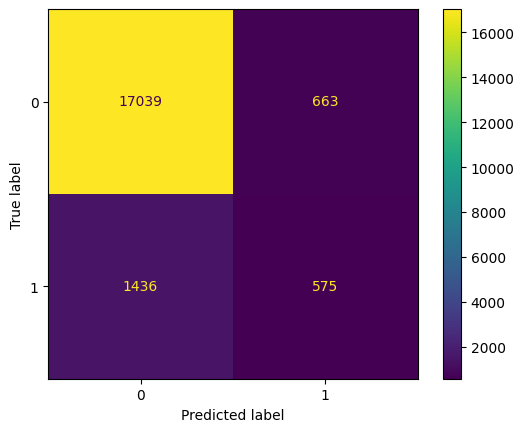

In [ ]:
# logregOpt = LogisticRegression(
#     C=1,max_iter=200,penalty='l2',solver='sag',tol=1/9,class_weight={0:.4,1:.6}
# )



# logregOpt.fit(X_train3_pca,y_train3)
# y_pred = logregOpt.predict_proba(X_test_pca)[:,1] > 0.25
# #y_pred = logregOpt.predict(X_test_pca)
# ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [ ]:
from sklearn.model_selection import HalvingGridSearchCV as HGS


from sklearn.model_selection import GridSearchCV
logreg_params = {
    'C':[0.05,0.5,1,1.5,2.5],
    'tol':np.linspace(0,0.5,50),
    'solver':['sag'],
    'penalty':['l1','l2'],
    'max_iter':[125,150,175,200],
    # 'class_weight':[
    #     {0:0.9,1:.1},
    #     {0:0.8,1:.2},
    #     {0:0.7,1:.3},
    #     {0:0.6,1:.4},
    #     {0:0.5,1:.5},
    #     {0:0.4,1:.6},
    #     {0:0.3,1:.7},
    #     {0:0.2,1:.8},
    #     {0:0.1,1:.9},
    # ]
}

# h_gs = HGS(
#     mod,
#     logreg_params,
#     cv=5,
#     factor=3,
#     min_resources='exhaust'
# )

ImportError: HalvingGridSearchCV is experimental and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_halving_search_cv:
from sklearn.experimental import enable_halving_search_cv

In [25]:
KNeighborsClassifier() #n_neighbors, weights = ['uniform','distance'], metric=['minkowski'], algorithm=['auto','brute']

knn_params = {
    'C':[0.05,0.5,1,1.5,2.5],
    'n_neighbors':[2,3,4,5],
    'weights':['uniform','distance'],
    'algorithm':['auto','brute']
}


,Model,Outlier Rounding,Accuracy,F1,Precision,Recall
6,KNN (k=3),2sd,0.794450,0.258690,0.204631,0.351566
7,KNN (k=5),2sd,0.759854,0.274816,0.198583,0.446047
8,KNN (k=7),2sd,0.731294,0.278633,0.191860,0.508702
9,KNN (k=9),2sd,0.708872,0.281817,0.188294,0.559920


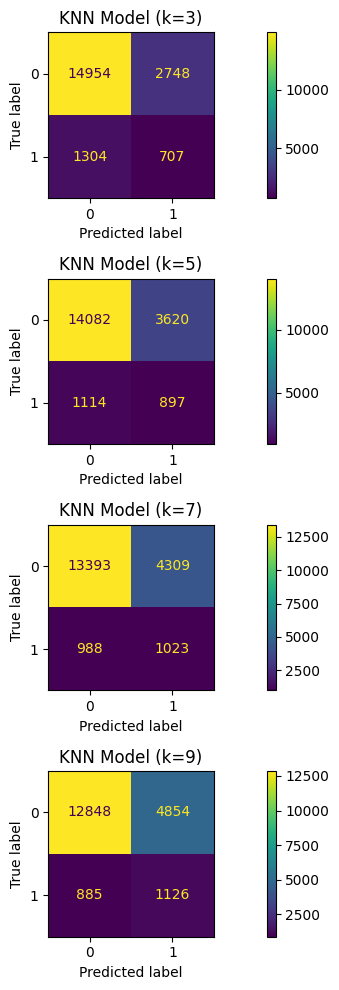

In [26]:
random.seed(123)

knn = KNeighborsClassifier(n_neighbors=3)#,weights='distance')#class_weights={0:.1,1:.9})
knn.fit(X_train2_pca,y_train2)
y_pred_3 = knn.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'KNN (k=3)',
    'Outlier Rounding':"2sd",
    'Accuracy':accuracy_score(y_test,y_pred_3),
    'F1':f1_score(y_test,y_pred_3),
    'Precision':precision_score(y_test,y_pred_3),
    'Recall':recall_score(y_test,y_pred_3)
}

# 5 Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2_pca,y_train2)
y_pred_5 = knn.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'KNN (k=5)',
    'Outlier Rounding':"2sd",
    'Accuracy':accuracy_score(y_test,y_pred_5),
    'F1':f1_score(y_test,y_pred_5),
    'Precision':precision_score(y_test,y_pred_5),
    'Recall':recall_score(y_test,y_pred_5)
}

# 7 Neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train2_pca,y_train2)
y_pred_7 = knn.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'KNN (k=7)',
    'Outlier Rounding':"2sd",
    'Accuracy':accuracy_score(y_test,y_pred_7),
    'F1':f1_score(y_test,y_pred_7),
    'Precision':precision_score(y_test,y_pred_7),
    'Recall':recall_score(y_test,y_pred_7)
}

# 9 Neighbors
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train2_pca,y_train2)
y_pred_9 = knn.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'KNN (k=9)',
    'Outlier Rounding':"2sd",
    'Accuracy':accuracy_score(y_test,y_pred_9),
    'F1':f1_score(y_test,y_pred_9),
    'Precision':precision_score(y_test,y_pred_9),
    'Recall':recall_score(y_test,y_pred_9)
}

# Display results
# test_metrics_df = pd.DataFrame(test_metrics)
# display(test_metrics_df[3:7].style.hide(axis='index'))

display(
    test_metrics[
        (test_metrics['Model'].str.contains('KNN')) & 
        (test_metrics['Outlier Rounding']=='2sd')    
    ]
)


fig, axes = plt.subplots(4, 1, figsize=(11, 10))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_3)).plot(ax=axes[0])
axes[0].set_title('KNN Model (k=3)')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_5)).plot(ax=axes[1])
axes[1].set_title('KNN Model (k=5)')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_7)).plot(ax=axes[2])
axes[2].set_title('KNN Model (k=7)')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_9)).plot(ax=axes[3])
axes[3].set_title('KNN Model (k=9)')

plt.tight_layout()
plt.show()

,Model,Outlier Rounding,Accuracy,F1,Precision,Recall
10,KNN (k=3),3sd,0.788921,0.246878,0.194081,0.339135
11,KNN (k=5),3sd,0.748186,0.260209,0.185784,0.434112
12,KNN (k=7),3sd,0.717344,0.262573,0.178900,0.493287
13,KNN (k=9),3sd,0.689748,0.261888,0.172908,0.539533


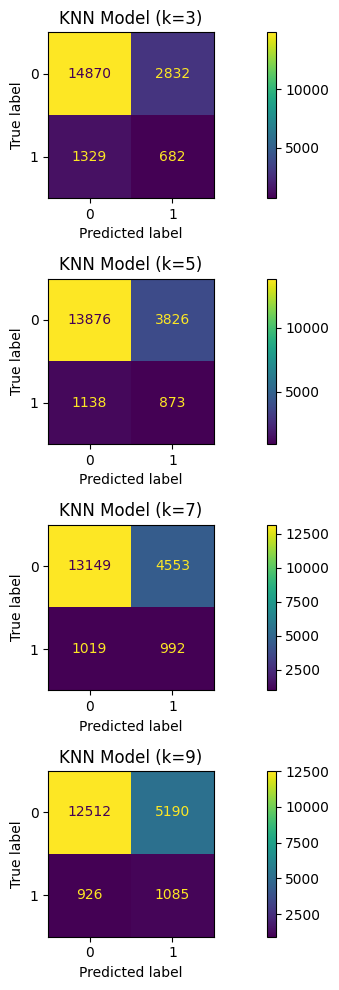

In [27]:
random.seed(123)

knn = KNeighborsClassifier(n_neighbors=3,weights='distance')#class_weights={0:.1,1:.9})
knn.fit(X_train3_pca,y_train3)
y_pred_3 = knn.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'KNN (k=3)',
    'Outlier Rounding':"3sd",
    'Accuracy':accuracy_score(y_test,y_pred_3),
    'F1':f1_score(y_test,y_pred_3),
    'Precision':precision_score(y_test,y_pred_3),
    'Recall':recall_score(y_test,y_pred_3)
}

# 5 Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train3_pca,y_train3)
y_pred_5 = knn.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'KNN (k=5)',
    'Outlier Rounding':"3sd",
    'Accuracy':accuracy_score(y_test,y_pred_5),
    'F1':f1_score(y_test,y_pred_5),
    'Precision':precision_score(y_test,y_pred_5),
    'Recall':recall_score(y_test,y_pred_5)
}

# 7 Neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train3_pca,y_train3)
y_pred_7 = knn.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'KNN (k=7)',
    'Outlier Rounding':"3sd",
    'Accuracy':accuracy_score(y_test,y_pred_7),
    'F1':f1_score(y_test,y_pred_7),
    'Precision':precision_score(y_test,y_pred_7),
    'Recall':recall_score(y_test,y_pred_7)
}

# 9 Neighbors
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train3_pca,y_train3)
y_pred_9 = knn.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'KNN (k=9)',
    'Outlier Rounding':"3sd",
    'Accuracy':accuracy_score(y_test,y_pred_9),
    'F1':f1_score(y_test,y_pred_9),
    'Precision':precision_score(y_test,y_pred_9),
    'Recall':recall_score(y_test,y_pred_9)
}

# Display results
# test_metrics_df = pd.DataFrame(test_metrics)
# display(test_metrics_df[3:7].style.hide(axis='index'))
display(
    test_metrics[
        (test_metrics['Model'].str.contains('KNN')) & 
        (test_metrics['Outlier Rounding']=='3sd')    
    ]
)


fig, axes = plt.subplots(4, 1, figsize=(11, 10))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_3)).plot(ax=axes[0])
axes[0].set_title('KNN Model (k=3)')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_5)).plot(ax=axes[1])
axes[1].set_title('KNN Model (k=5)')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_7)).plot(ax=axes[2])
axes[2].set_title('KNN Model (k=7)')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_9)).plot(ax=axes[3])
axes[3].set_title('KNN Model (k=9)')

plt.tight_layout()
plt.show()

,Model,Outlier Rounding,Accuracy,F1,Precision,Recall
26,SVM-Poly,2sd,0.832902,0.386821,0.309134,0.516658
27,SVM-RBF,2sd,0.731396,0.311891,0.211119,0.596718
28,SVM-Sigmoid,2sd,0.623396,0.253119,0.158658,0.625559


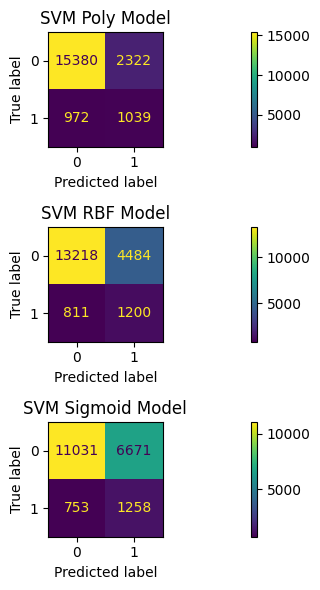

In [60]:
random.seed(123)

spt_vector = svm.SVC(
    kernel='poly',degree=1,#probability=True,class_weight={0:0.2,1:0.8}
).fit(X_train2_pca,y_train2)

y_pred_poly = spt_vector.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'SVM-Poly',
    'Outlier Rounding':"2sd",
    'Accuracy':accuracy_score(y_test,y_pred_poly),
    'F1':f1_score(y_test,y_pred_poly),
    'Precision':precision_score(y_test,y_pred_poly),
    'Recall':recall_score(y_test,y_pred_poly)
}

# SVM RBF
spt_vector_rbf = svm.SVC(
    kernel='rbf',degree=1,#probability=True,class_weight={0:0.2,1:0.8}
).fit(X_train2_pca,y_train2)

y_pred_rbf = spt_vector_rbf.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'SVM-RBF',
    'Outlier Rounding':"2sd",
    'Accuracy':accuracy_score(y_test,y_pred_rbf),
    'F1':f1_score(y_test,y_pred_rbf),
    'Precision':precision_score(y_test,y_pred_rbf),
    'Recall':recall_score(y_test,y_pred_rbf)
}

# SVM Sigmoid
spt_vector_sigmoid = svm.SVC(
    kernel='sigmoid',degree=1,#probability=True,class_weight={0:0.2,1:0.8}
).fit(X_train2_pca,y_train2)

y_pred_sigmoid = spt_vector_sigmoid.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'SVM-Sigmoid',
    'Outlier Rounding':"2sd",
    'Accuracy':accuracy_score(y_test,y_pred_sigmoid),
    'F1':f1_score(y_test,y_pred_sigmoid),
    'Precision':precision_score(y_test,y_pred_sigmoid),
    'Recall':recall_score(y_test,y_pred_sigmoid)
}

# Display results
test_metrics_df = pd.DataFrame(test_metrics)
#display(test_metrics_df[7:].style.hide(axis='index'))
display(
    test_metrics[
        (test_metrics['Model'].str.contains('SVM')) & 
        (test_metrics['Outlier Rounding']=='2sd')    
    ]
)

fig, axes = plt.subplots(3, 1, figsize=(18, 6))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_poly)).plot(ax=axes[0])
axes[0].set_title('SVM Poly Model')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rbf)).plot(ax=axes[1])
axes[1].set_title('SVM RBF Model')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_sigmoid)).plot(ax=axes[2])
axes[2].set_title('SVM Sigmoid Model')

plt.tight_layout()
plt.show()

In [61]:
random.seed(123)

spt_vector = svm.SVC(
    kernel='poly',degree=1,#probability=True,class_weight={0:0.2,1:0.8}
).fit(X_train3_pca,y_train3)

y_pred_poly = spt_vector.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'SVM-Poly',
    'Outlier Rounding':"3sd",
    'Accuracy':accuracy_score(y_test,y_pred_poly),
    'F1':f1_score(y_test,y_pred_poly),
    'Precision':precision_score(y_test,y_pred_poly),
    'Recall':recall_score(y_test,y_pred_poly)
}

# SVM RBF
spt_vector_rbf = svm.SVC(
    kernel='rbf',degree=1,#probability=True,class_weight={0:0.2,1:0.8}
).fit(X_train3_pca,y_train3)

y_pred_rbf = spt_vector_rbf.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'SVM-RBF',
    'Outlier Rounding':"3sd",
    'Accuracy':accuracy_score(y_test,y_pred_rbf),
    'F1':f1_score(y_test,y_pred_rbf),
    'Precision':precision_score(y_test,y_pred_rbf),
    'Recall':recall_score(y_test,y_pred_rbf)
}

# SVM Sigmoid
spt_vector_sigmoid = svm.SVC(
    kernel='sigmoid',degree=1,#probability=True,class_weight={0:0.2,1:0.8}
).fit(X_train3_pca,y_train3)

y_pred_sigmoid = spt_vector_sigmoid.predict(X_test_pca)
test_metrics.loc[len(test_metrics)] = {
    'Model':'SVM-Sigmoid',
    'Outlier Rounding':"3sd",
    'Accuracy':accuracy_score(y_test,y_pred_sigmoid),
    'F1':f1_score(y_test,y_pred_sigmoid),
    'Precision':precision_score(y_test,y_pred_sigmoid),
    'Recall':recall_score(y_test,y_pred_sigmoid)
}

# Display results
# test_metrics_df = pd.DataFrame(test_metrics)
# display(test_metrics_df[test_metrics_df['model'].str.contains('SVM')])
#display(test_metrics_df[7:].style.hide(axis='index'))

display(
    test_metrics[
        (test_metrics['Model'].str.contains('SVM')) & 
        (test_metrics['Outlier Rounding']=='3sd')    
    ]
)

fig, axes = plt.subplots(3, 1, figsize=(18, 6))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_poly)).plot(ax=axes[0])
axes[0].set_title('SVM Poly Model')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rbf)).plot(ax=axes[1])
axes[1].set_title('SVM RBF Model')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_sigmoid)).plot(ax=axes[2])
axes[2].set_title('SVM Sigmoid Model')

plt.tight_layout()
plt.show()

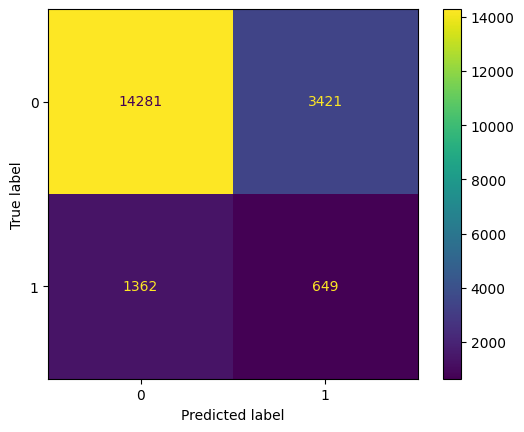

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rfc = DecisionTreeClassifier(criterion='entropy') #RandomForestClassifier()
rfc.fit(X_train3,y_trn3)

y_pred_rfc = rfc.predict(X_test)

rfc_data = pd.DataFrame( {
    'Model':'RandomForest',
    'Outlier Rounding':"3sd",
    'Accuracy':accuracy_score(y_test,y_pred_rfc),
    'F1':f1_score(y_test,y_pred_rfc),
    'Precision':precision_score(y_test,y_pred_rfc),
    'Recall':recall_score(y_test,y_pred_rfc)
},index=[0])
ConfusionMatrixDisplay(confusion_matrix(y_pred=y_pred_rfc,y_true=y_test)).plot()

In [297]:
test_metrics.sort_values(by='F1',ascending=False)

,Model,Outlier Rounding,Accuracy,F1,Precision,Recall
3,Logistic Regression (TUNED),3sd,0.841171,0.395677,0.323344,0.509697
5,Logistic Regression (SMOTE),3sd,0.787551,0.367563,0.263934,0.605172
2,Logistic Regression (SMOTE),2sd,0.785877,0.352905,0.255098,0.572352
15,SVM-RBF,2sd,0.887790,0.338912,0.424719,0.281949
18,SVM-RBF,3sd,0.882362,0.335720,0.395946,0.291397
4,Logistic Regression (ADASYN),3sd,0.736012,0.334186,0.224978,0.649428
1,Logistic Regression (ADASYN),2sd,0.726120,0.314587,0.211217,0.616111
0,Logistic Regression (TUNED),2sd,0.666362,0.297854,0.189641,0.693685
14,SVM-Poly,2sd,0.902957,0.232651,0.601660,0.144207
17,SVM-Poly,3sd,0.902856,0.226263,0.603448,0.139234


In [298]:
test_metrics.sort_values(by='Precision',ascending=False)

,Model,Outlier Rounding,Accuracy,F1,Precision,Recall
17,SVM-Poly,3sd,0.902856,0.226263,0.603448,0.139234
14,SVM-Poly,2sd,0.902957,0.232651,0.601660,0.144207
9,KNN (k=9),2sd,0.895703,0.174297,0.453027,0.107907
15,SVM-RBF,2sd,0.887790,0.338912,0.424719,0.281949
13,KNN (k=9),3sd,0.894283,0.143796,0.413712,0.087021
12,KNN (k=7),3sd,0.893015,0.160764,0.402390,0.100448
18,SVM-RBF,3sd,0.882362,0.335720,0.395946,0.291397
8,KNN (k=7),2sd,0.889312,0.170973,0.362319,0.111885
7,KNN (k=5),2sd,0.886471,0.193223,0.351245,0.133267
11,KNN (k=5),3sd,0.886674,0.183480,0.346207,0.124814


In [299]:
test_metrics.sort_values(by='Recall',ascending=False)

,Model,Outlier Rounding,Accuracy,F1,Precision,Recall
0,Logistic Regression (TUNED),2sd,0.666362,0.297854,0.189641,0.693685
4,Logistic Regression (ADASYN),3sd,0.736012,0.334186,0.224978,0.649428
1,Logistic Regression (ADASYN),2sd,0.726120,0.314587,0.211217,0.616111
5,Logistic Regression (SMOTE),3sd,0.787551,0.367563,0.263934,0.605172
2,Logistic Regression (SMOTE),2sd,0.785877,0.352905,0.255098,0.572352
3,Logistic Regression (TUNED),3sd,0.841171,0.395677,0.323344,0.509697
18,SVM-RBF,3sd,0.882362,0.335720,0.395946,0.291397
19,SVM-Sigmoid,3sd,0.778725,0.210926,0.165766,0.289906
15,SVM-RBF,2sd,0.887790,0.338912,0.424719,0.281949
16,SVM-Sigmoid,2sd,0.800994,0.191301,0.163380,0.230731
